In [11]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 
import folium
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# AppleGothic 폰트 경로 가져오기
font_path = fm.findfont(fm.FontProperties(family='AppleGothic'))

# 한글 폰트 등록
plt.rcParams['font.family'] = 'AppleGothic'

In [12]:
yc_1=pd.read_csv('20230512164942_방문자 거주지 분포.csv',encoding='CP949')
yc_2=pd.read_csv('20230512164952_방문자 유출지 분포.csv',encoding='CP949')
yc_1.head(5)
yc_2.head(5)

,광역지자체명,기초지자체명,기초지자체별 거주 방문자 수
0,경상북도,경산시,1778732.0
1,경상북도,경주시,665921.0
2,경상북도,포항시 북구,569919.0
3,경상북도,포항시 남구,387907.0
4,경상북도,구미시,256687.0


,광역지자체명,기초지자체명,기초지자체별 유출 방문자 수
0,강원도,강릉시,510.0
1,강원도,삼척시,724.0
2,강원도,속초시,195.0
3,강원도,양양군,105.0
4,강원도,영월군,219.0


In [13]:
yc_1=yc_1.groupby('광역지자체명')['기초지자체별 거주 방문자 수'].sum().sort_values(ascending=False)
yc_2=yc_2.groupby('광역지자체명')['기초지자체별 유출 방문자 수'].sum().sort_values(ascending=False)

([<matplotlib.patches.Wedge at 0x7fc994437190>,
 [Text(-1.0030957382967005, 0.4514409593856073, '경상북도'),
  Text(0.3257417780975831, -1.050662787959022, '대구광역시'),
  Text(1.0993175446864094, 0.03874191457122999, '경기도'),
  Text(1.0373493941663385, 0.3659320079232349, '울산광역시'),
  Text(0.8966380050488032, 0.6372129062582635, '부산광역시'),
  Text(0.7188938173585652, 0.8325813349839343, '경상남도'),
  Text(0.5297178660448326, 0.9640534126244816, '서울특별시'),
  Text(0.3927694382914089, 1.0274882813659, ''),
  Text(0.32335574744248025, 1.0513995722825433, ''),
  Text(0.2605636218145247, 1.0686938752453377, ''),
  Text(0.20521110122821642, 1.0806888562082533, ''),
  Text(0.1539003176120943, 1.0891807436045207, ''),
  Text(0.11043464760865664, 1.0944424099090604, ''),
  Text(0.07331913253691438, 1.097553782192032, ''),
  Text(0.04407770088653687, 1.099116534442348, ''),
  Text(0.024564497155191645, 1.099725686468909, ''),
  Text(0.007968070659871825, 1.099971140462312, '')],
 [Text(-0.5471431299800184, 0.24

([<matplotlib.patches.Wedge at 0x7fc99601a9a0>,
 [Text(-1.0239814117190038, -0.4018234294487517, '경상북도'),
  Text(1.0999348365516162, 0.011973109043589824, '대구광역시'),
  Text(0.617631503304621, 0.9102369615246758, '부산광역시'),
  Text(0.38751547129239444, 1.0294813060512724, '울산광역시'),
  Text(0.22133853008141868, 1.0775013944777043, ''),
  Text(0.14837287474416247, 1.089947471229762, ''),
  Text(0.11461654727777103, 1.0940123614887185, ''),
  Text(0.08846721295171532, 1.0964367524999132, ''),
  Text(0.07031853236339043, 1.0977501100005678, ''),
  Text(0.05447450091574555, 1.0986503214171381, ''),
  Text(0.039442702507950594, 1.099292624017313, ''),
  Text(0.025413559396749753, 1.099706393088077, ''),
  Text(0.013988801078841158, 1.0999110479690513, ''),
  Text(0.007259979767587255, 1.0999760418726283, ''),
  Text(0.003899138670393619, 1.0999930893953966, ''),
  Text(0.0013088863578042428, 1.0999992212799528, ''),
  Text(6.998644259807274e-05, 1.09999999777359, '')],
 [Text(-0.558535315483093, 

Text(0.5, 1.0, '방문자 거주지 분포')

Text(0.5, 1.0, '방문자 유출지 분포')

(-1.1126185219102707,
 1.1021291377102709,
 -1.1117200266717715,
 1.1005580965096011)

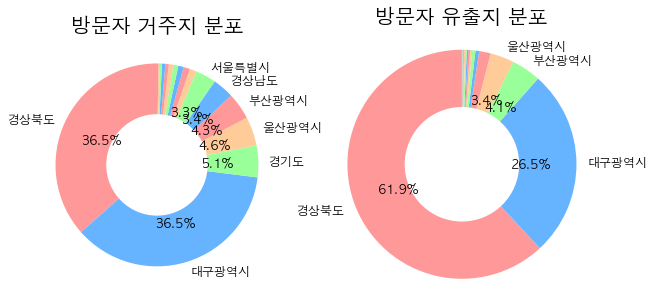

In [14]:
import matplotlib.pyplot as plt

# 데이터 설정
labels1 = yc_1.index
labels1 = list(labels1[:7]) + [''] * (len(labels1) - 7)  # 광역지자체명
sizes1 = yc_1.values  # 기초지자체별 거주 방문자 수
colors1 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # 색상 설정

labels2 = yc_2.index
labels2 = list(labels2[:4]) + [''] * (len(labels2) - 4)  # 광역지자체명
sizes2 = yc_2.values  # 기초지자체별 거주 방문자 수
colors2 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # 색상 설정

def my_autopct(pct):
    return f"{pct:.1f}%" if pct > 2 else ""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

centre_circle1 = plt.Circle((0, 0), 0.5, fc='white')
ax1.add_artist(centre_circle1)
ax1.pie(sizes1,labels=labels1,colors=colors1,autopct=my_autopct, startangle=90,textprops={'fontsize': 12})


ax2.pie(sizes2,labels=labels2,colors=colors2,autopct=my_autopct, startangle=90,textprops={'fontsize': 12})
centre_circle2 = plt.Circle((0, 0), 0.5, fc='white')
ax2.add_artist(centre_circle2)


# 타이틀 설정
ax1.set_title("방문자 거주지 분포", fontsize=20)
ax2.set_title("방문자 유출지 분포", fontsize=20)


# 그래프 출력
plt.axis('equal')
plt.show()

In [19]:
people=pd.read_csv('행정안전부_지역별(행정동) 성별 연령별 주민등록 인구수_20230228.csv',encoding='CP949')

In [20]:
people.head()

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,...,만101세여자,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자
0,1111051500,2023-02-28,서울특별시,종로구,청운효자동,11605,5325,6280,14,22,...,1,0,0,0,0,0,0,0,0,0
1,1111053000,2023-02-28,서울특별시,종로구,사직동,9120,4060,5060,12,24,...,0,0,0,0,0,0,0,0,0,0
2,1111054000,2023-02-28,서울특별시,종로구,삼청동,2322,1104,1218,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1111055000,2023-02-28,서울특별시,종로구,부암동,9178,4340,4838,13,14,...,1,1,0,0,0,0,0,0,0,0
4,1111056000,2023-02-28,서울특별시,종로구,평창동,17602,8212,9390,33,46,...,2,0,1,0,0,1,0,1,0,0


# 대구 광역시

In [21]:
dg=people[people['시도명']=='대구광역시']
dg['시군구명'].unique()
dg.head()

array(['중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군'], dtype=object)

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,...,만101세여자,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자
631,2711051700,2023-02-28,대구광역시,중구,동인동,8194,4087,4107,18,19,...,0,2,0,0,0,0,1,0,0,0
632,2711054500,2023-02-28,대구광역시,중구,삼덕동,6407,3062,3345,13,8,...,0,0,0,0,0,0,0,0,0,0
633,2711056500,2023-02-28,대구광역시,중구,성내1동,4826,2313,2513,3,4,...,0,0,0,0,0,0,0,0,0,0
634,2711057500,2023-02-28,대구광역시,중구,성내2동,4936,2483,2453,12,13,...,0,0,0,0,0,0,0,0,0,0
635,2711058500,2023-02-28,대구광역시,중구,성내3동,4869,2448,2421,32,34,...,0,0,0,0,0,0,0,0,0,0


In [22]:
age=dg.iloc[:,8:]
not_age=dg.iloc[:,:8]
df2=not_age.copy()
for i in range(12):
    a=age.iloc[:,10*i:10*(i+1)].sum(axis=1)
    df2[f'{i*10}대 남자']=a
for i in range(11,23):
    a=age.iloc[:,10*i+1:10*(i+1)+1].sum(axis=1)
    df2[f'{i*10-110}대 여자']=a
df2

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,0대 남자,10대 남자,...,20대 여자,30대 여자,40대 여자,50대 여자,60대 여자,70대 여자,80대 여자,90대 여자,100대 여자,110대 여자
631,2711051700,2023-02-28,대구광역시,중구,동인동,8194,4087,4107,143,232,...,682,573,453,559,625,487,286,53,4,0
632,2711054500,2023-02-28,대구광역시,중구,삼덕동,6407,3062,3345,163,183,...,979,545,412,333,353,202,129,17,1,0
633,2711056500,2023-02-28,대구광역시,중구,성내1동,4826,2313,2513,58,95,...,912,351,230,248,251,218,124,31,0,0
634,2711057500,2023-02-28,대구광역시,중구,성내2동,4936,2483,2453,112,126,...,512,311,265,313,346,285,160,24,1,0
635,2711058500,2023-02-28,대구광역시,중구,성내3동,4869,2448,2421,282,133,...,248,438,356,322,311,203,112,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2771026200,2023-02-28,대구광역시,달성군,옥포읍,24453,12301,12152,1171,972,...,1007,1598,1769,2015,2101,1050,559,80,0,0
771,2771026500,2023-02-28,대구광역시,달성군,현풍읍,22853,12020,10833,1075,983,...,1190,1703,1693,1444,1461,818,504,67,1,0
772,2771031000,2023-02-28,대구광역시,달성군,가창면,7602,3784,3818,166,273,...,220,256,430,563,864,551,436,105,3,0
773,2771033000,2023-02-28,대구광역시,달성군,하빈면,3450,1882,1568,35,63,...,73,73,99,278,392,252,256,56,1,0


# 도로명 주소를 위도 경도로 변환해주는 코드

In [23]:
!pip install geopy

In [24]:
from geopy.geocoders import ArcGIS

def geocoding(address):
    try:
        geo = ArcGIS(user_agent='South Korea').geocode(address, timeout=10)
        x_y = [geo.latitude, geo.longitude]
        return x_y
    except:
        return [0,0]

address = "경상북도 구미시 구미중앙로 12"
x_y = geocoding(address)
print(x_y)

[36.1315611871572, 128.32459420353388]


In [11]:
geocoding('경북 구미시 구미중앙로 76')

[36.12833013112113, 128.33093947187575]

In [56]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent='South Korea')

# def geocoding(address):
#     try:
#         location = geolocator.geocode(address, timeout=10, exactly_one=True)
#         return (location.latitude, location.longitude)
#     except:
#         return (0, 0)

# address = '경기도 화성시 봉담읍 와우리 230'
# lat, lng = geocoding(address)
# print(lat, lng)

0 0


# 대구 지하철 승하차

In [25]:
dg_sub=pd.read_csv('대구교통공사_역별일별시간별승하차인원현황_20230228.csv',encoding='CP949')
dg_sub.head(5)
dg_sub['역명']=dg_sub['역명'].replace('반월당1','반월당')
dg_sub['역명']=dg_sub['역명'].replace('반월당2','반월당')
dg_sub['역명']=dg_sub['역명'].replace('명덕1','명덕')
dg_sub['역명']=dg_sub['역명'].replace('명덕3','명덕')
dg_sub['역명']=dg_sub['역명'].replace('청라언덕2','청라언덕')
dg_sub['역명']=dg_sub['역명'].replace('청라언덕3','청라언덕')

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,26,39,63,105,132,...,219,211,216,119,122,58,48,26,3,2426
1,1,1,1150,설화명곡,하차,0,65,49,55,90,...,193,184,218,175,165,140,168,101,57,2276
2,1,1,1160,화원,승차,19,44,40,115,129,...,302,254,230,136,80,60,59,34,2,2760
3,1,1,1160,화원,하차,4,57,44,76,116,...,276,209,198,180,139,88,98,106,70,2772
4,1,1,1170,대곡,승차,26,48,66,117,149,...,187,182,160,127,89,61,60,38,9,2327


In [26]:
ride=dg_sub[dg_sub['승하차']=='승차'].sort_values(ascending=False,by='일계')
take_off=dg_sub[dg_sub['승하차']=='하차'].sort_values(ascending=False,by='일계')
ride=ride.groupby('역명')[['05시-06시', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시','일계']].sum().sort_values(ascending=False,by='일계').reset_index()
take_off=take_off.groupby('역명')[['05시-06시', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시','일계']].sum().sort_values(ascending=False,by='일계').reset_index()

ride
take_off

,역명,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,반월당,7242,10139,14980,23430,24934,39879,69859,88878,108315,...,157770,171887,176966,188714,128624,132856,116996,96561,47753,1738113
1,동대구역,3529,6594,17661,40244,35062,47279,59568,60874,59199,...,73755,79640,83626,94999,69961,75075,58499,42344,14075,990559
2,중앙로,2976,3810,5265,9231,8451,13516,21831,28351,36699,...,74144,102378,110742,113178,73519,64163,69084,55905,23702,867614
3,상인,6843,13230,35658,55089,40827,37816,43148,43840,44552,...,40594,38513,40112,41233,23243,22383,17201,16150,6295,607272
4,서부정류장,4237,6072,15449,27977,24262,28775,33800,37611,37719,...,40934,42396,37588,33639,17681,11770,8818,5972,2181,454638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,어린이회관,455,934,3373,5496,3348,3254,3809,3849,4707,...,4201,4004,4485,5577,2477,2270,1882,1226,557,60326
84,팔달,890,1982,3789,6321,4257,4413,4205,4139,4446,...,3741,3977,4837,3801,1918,1111,972,446,387,59348
85,대공원,274,621,1044,1724,1513,1361,1713,1902,2084,...,2420,3319,4342,6985,2665,1309,947,612,180,37043
86,연호,269,754,2269,4616,1888,1424,1704,1836,2030,...,2175,2694,3722,4200,1173,751,583,504,188,34707


,역명,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,반월당,5330,14121,34075,131238,141206,125212,157715,170425,166350,...,144105,134211,137429,147531,67313,35293,23457,17282,11732,1825532
1,동대구역,2982,26569,35163,73966,70107,70256,58532,66322,66524,...,70136,75030,75214,87144,54700,35926,30957,16273,7913,993379
2,중앙로,3124,8247,16297,68258,54031,50813,69544,102486,116117,...,74495,64465,62450,69419,37079,19776,12743,6958,4400,933004
3,상인,398,6480,14532,32183,27475,24879,26740,30877,35172,...,42591,47099,57965,70791,44871,30592,29807,24585,16782,600089
4,서부정류장,1095,8389,12246,28614,24935,25222,32454,31014,36485,...,37959,34868,33373,31951,20532,13238,10728,8945,5030,433093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,칠곡경대병원,84,1587,5179,11251,5911,4125,3206,3610,5007,...,3406,2816,3016,2116,1452,1335,1019,587,786,61116
84,어린이회관,161,927,2257,5983,3320,2769,3179,3537,3539,...,3932,4599,5698,6741,3081,2486,1982,1578,1059,60709
85,대공원,46,1247,1869,8133,2849,1575,1438,1549,1871,...,1599,1426,1479,1608,817,680,745,593,215,31306
86,연호,117,582,1558,3492,1868,1467,1267,2058,1506,...,1407,1580,2193,2863,1437,1257,1391,1120,497,29251


대구 지하철 승하차 시각화

<AxesSubplot:xlabel='역명', ylabel='일계'>

Text(0.5, 1.0, '역별 일일 승차 인구수')

Text(0.5, 0, '역명')

Text(0, 0.5, '승차 인원')

<AxesSubplot:xlabel='역명', ylabel='일계'>

Text(0.5, 1.0, '역별 일일 하차 인구수')

Text(0.5, 0, '역명')

Text(0, 0.5, '하차 인원')

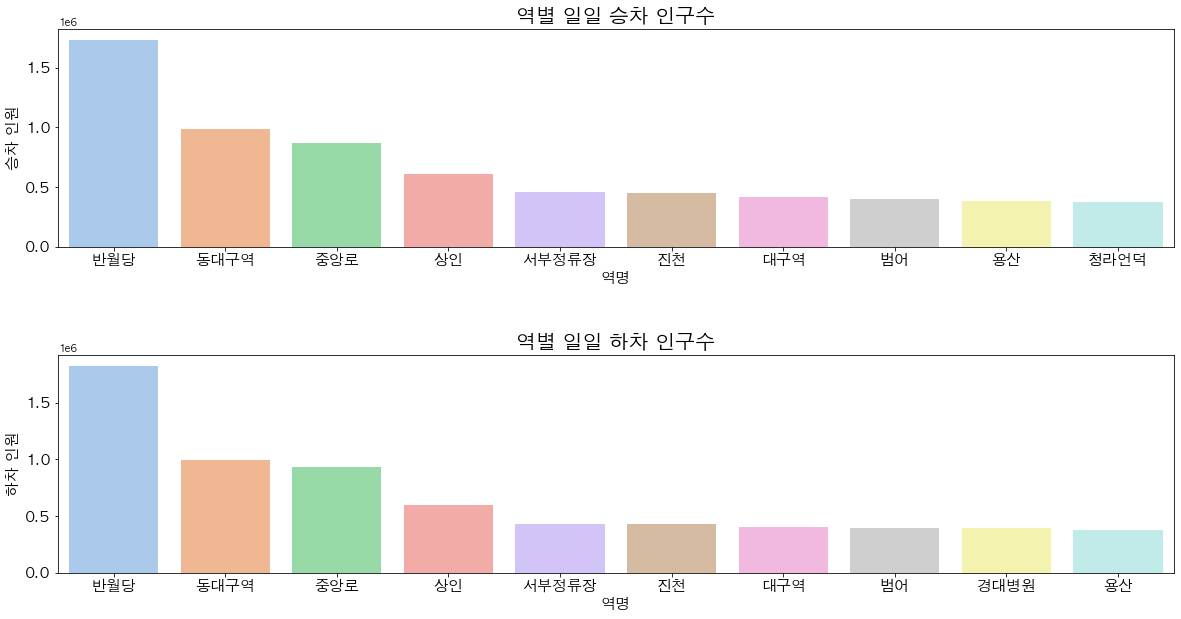

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(20,10))
sns.barplot(x='역명', y='일계', data=ride.head(10), palette='pastel', ax=axs[0])
axs[0].set_title('역별 일일 승차 인구수',fontsize=20)
axs[0].set_xlabel('역명',fontsize=15)
axs[0].set_ylabel('승차 인원',fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

sns.barplot(x='역명',y='일계',data=take_off.head(10),palette='pastel',ax=axs[1])
axs[1].set_title('역별 일일 하차 인구수',fontsize=20)
axs[1].set_xlabel('역명',fontsize=15)
axs[1].set_ylabel('하차 인원',fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [28]:
add_dg=['대구광역시 중구 달구벌대로 2100','대구 동구 동대구로 550','대구 중구 중앙대로 424','대구 달서구 월배로 223','대구 남구 월배로 501']

In [29]:
lat_dg = []
long_dg =[]

for i in add_dg:
    lat_dg.append(geocoding(i)[0])
    long_dg.append(geocoding(i)[1])

In [30]:
lat_dg
long_dg

[35.86550327756699,
 35.87943617993939,
 35.87096467421901,
 35.81895198943975,
 35.8371291942136]

[128.5934938716672,
 128.62877556524649,
 128.59401296293083,
 128.5378971269996,
 128.55702949154983]

대구 지하철 유동 인구 많은 상위 5개 역 지도 표시

In [31]:
# !pip install geopandas

In [32]:
center=[geocoding('대구광역시 중구 달구벌대로 2100')[0],geocoding('대구광역시 중구 달구벌대로 2100')[1]]
m = folium.Map(location=center,zoom_start=17, 
               width=750, 
               height=500)
tooltip=['반월당역','동대구역','중앙로역','상인역','서부정류장역']
for i in range(len(lat_dg)):
    folium.Marker([lat_dg[i], long_dg[i]],
                        color='tomato',
                        radius = 100, 
                        icon=folium.Icon('tomato'),
                        tooltip=tooltip[i]).add_to(m)

m

셔틀 출발: <반월당역> - <동대구역>

# 경상북도 

In [33]:
gb=people[people['시도명']=='경상북도']
gb['시군구명'].unique()
gb.head()

array(['포항시 남구', '포항시 북구', '경주시', '김천시', '안동시', '구미시', '영주시', '영천시',
       '상주시', '문경시', '경산시', '군위군', '의성군', '청송군', '영양군', '영덕군', '청도군',
       '고령군', '성주군', '칠곡군', '예천군', '봉화군', '울진군', '울릉군'], dtype=object)

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,...,만101세여자,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자
2883,4711125000,2023-02-28,경상북도,포항시 남구,구룡포읍,7028,3545,3483,4,1,...,1,0,0,0,0,0,0,0,0,0
2884,4711125300,2023-02-28,경상북도,포항시 남구,연일읍,29710,15090,14620,39,48,...,0,0,0,0,0,0,0,0,0,0
2885,4711125600,2023-02-28,경상북도,포항시 남구,오천읍,55756,29902,25854,167,194,...,0,2,0,0,0,0,1,1,0,0
2886,4711131000,2023-02-28,경상북도,포항시 남구,대송면,3307,1723,1584,1,2,...,0,0,1,0,0,0,0,0,0,0
2887,4711132000,2023-02-28,경상북도,포항시 남구,동해면,9715,4896,4819,22,19,...,1,0,0,0,0,0,1,0,0,0


In [34]:
age=gb.iloc[:,8:]
not_age=gb.iloc[:,:8]
df2=not_age.copy()

In [35]:
for i in range(12):
    a=age.iloc[:,10*i:10*(i+1)].sum(axis=1)
    df2[f'{i*10}대 남자']=a
for i in range(11,23):
    a=age.iloc[:,10*i+1:10*(i+1)+1].sum(axis=1)
    df2[f'{i*10-110}대 여자']=a
df2

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,0대 남자,10대 남자,...,20대 여자,30대 여자,40대 여자,50대 여자,60대 여자,70대 여자,80대 여자,90대 여자,100대 여자,110대 여자
2883,4711125000,2023-02-28,경상북도,포항시 남구,구룡포읍,7028,3545,3483,46,121,...,120,134,254,529,951,745,536,64,2,0
2884,4711125300,2023-02-28,경상북도,포항시 남구,연일읍,29710,15090,14620,965,1816,...,1377,1253,2485,2969,2367,978,509,74,1,0
2885,4711125600,2023-02-28,경상북도,포항시 남구,오천읍,55756,29902,25854,2443,3239,...,2511,3244,4822,4073,3521,1555,847,133,4,0
2886,4711131000,2023-02-28,경상북도,포항시 남구,대송면,3307,1723,1584,27,63,...,81,98,107,263,457,287,175,37,1,0
2887,4711132000,2023-02-28,경상북도,포항시 남구,동해면,9715,4896,4819,231,375,...,357,429,544,845,978,617,394,62,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,4793040000,2023-02-28,경상북도,울진군,매화면,1949,936,1013,15,36,...,36,22,57,126,230,184,233,72,1,0
3222,4794025000,2023-02-28,경상북도,울릉군,울릉읍,6346,3533,2813,113,161,...,240,226,356,516,608,377,172,31,0,0
3223,4794031000,2023-02-28,경상북도,울릉군,서면,908,493,415,22,27,...,19,27,44,87,82,68,50,8,0,0
3224,4794031500,2023-02-28,경상북도,울릉군,서면태하출장소,439,245,194,9,10,...,6,12,2,33,61,32,28,11,0,0


# 경상북도 인구 수 많은 상위 두개 지역

전체 인구 수 기준

(<Figure size 1440x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='시군구명', ylabel='계'>

,시군구명,계
0,구미시,407387
1,포항시 북구,268273


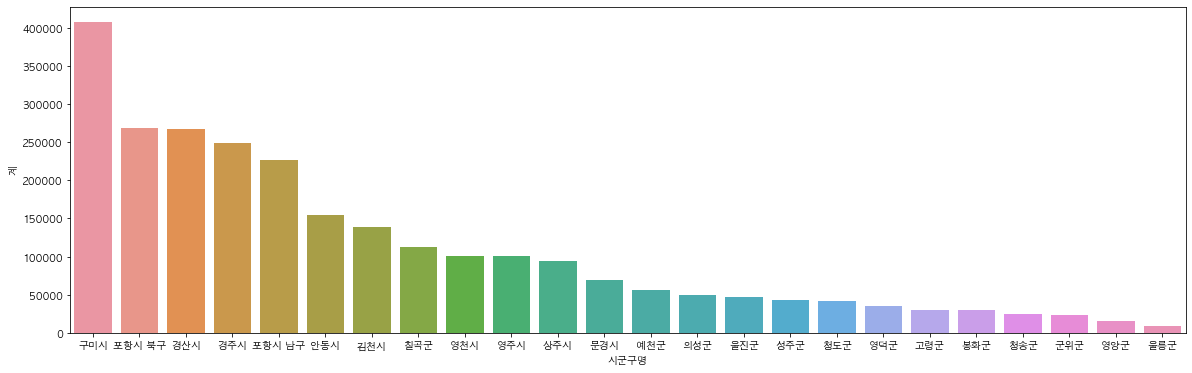

In [36]:
tot=df2[['시군구명','계']].groupby('시군구명')['계'].sum().sort_values(ascending=False).to_frame().reset_index()
#tot
plt.subplots(figsize=(20, 6))
sns.barplot(x='시군구명',y='계',data=tot)
tot.head(2)

40~50대 인구 수 기준

,시군구명,계
0,구미시,142774
1,포항시 북구,87449


(<Figure size 1440x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='시군구명', ylabel='계'>

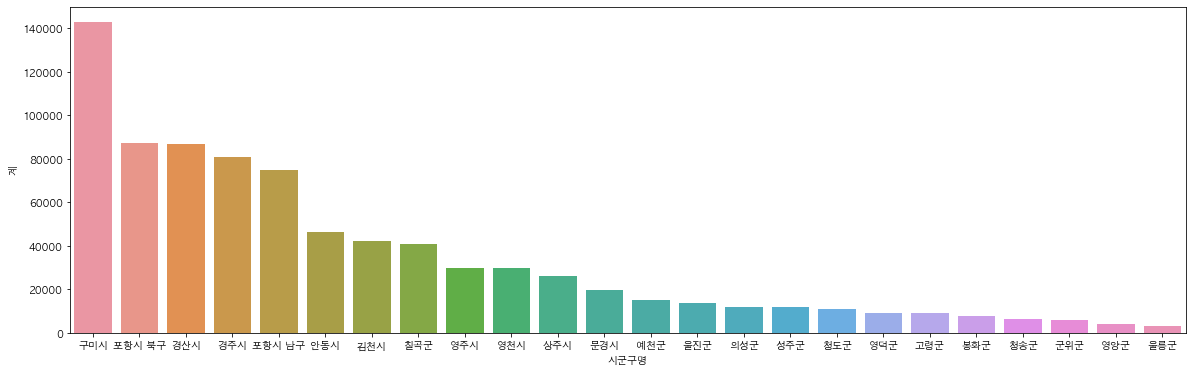

In [37]:
tot2=df2[['시군구명','40대 남자','50대 남자','40대 여자','50대 여자']].groupby('시군구명')[['40대 남자','50대 남자','40대 여자','50대 여자']].sum()
tot2=tot2.sum(axis=1).sort_values(ascending=False).to_frame().reset_index()
tot2= tot2.rename(columns={0: '계'})
tot2.head(2)
plt.subplots(figsize=(20, 6))
sns.barplot(x='시군구명',y='계',data=tot2)

# 주요 시군구의 인구 수가 많은 읍면동 세군데 추출

전체 인구 수 기준

<구미>

In [38]:
df2[df2['시군구명']=='구미시'].sort_values(by='계', ascending=False).head(3)['읍면동명']

3003      인동동
3005      양포동
2994    선주원남동
Name: 읍면동명, dtype: object

<포항시 북구>

In [39]:
df2[df2['시군구명']=='포항시 북구'].sort_values(by='계', ascending=False).head(3)['읍면동명']

2911    장량동
2897    흥해읍
2909    우창동
Name: 읍면동명, dtype: object

40-50대 인구 수 기준

<구미>

In [40]:
a=df2[df2['시군구명']=='구미시'][['읍면동명','40대 남자','50대 남자','40대 여자','50대 여자']].groupby('읍면동명')[['40대 남자','50대 남자','40대 여자','50대 여자']].sum()
a.sum(axis=1).sort_values(ascending=False).head(3)

읍면동명
인동동      16942
양포동      16453
선주원남동    14182
dtype: int64

<포항시 북구>

In [41]:
b=df2[df2['시군구명']=='포항시 북구'][['읍면동명','40대 남자','50대 남자','40대 여자','50대 여자']].groupby('읍면동명')[['40대 남자','50대 남자','40대 여자','50대 여자']].sum()
pohang_top3=b.sum(axis=1).sort_values(ascending=False).head(3)

# 상위 두개 지역에 상위 3개의 읍면동 찍기

<구미>

In [42]:
# 인동동 양포동 선주원남동
address1=['경상북도 구미시 인동15길 42','경상북도 구미시 산호대로35길 6','경상북도 구미시 봉곡로 42']

In [43]:
latitude1 = []
longitude1 =[]

for i in address1:
    latitude1.append(geocoding(i)[0])
    longitude1.append(geocoding(i)[1])

파란점-상위 3개의 읍면동
빨간점-구미시 최다승차 버스 지점 5군데 (구미역1-금오산사거리-구미역2 같은 위치)

In [44]:
center = [36.1327723, 128.3200213]

m = folium.Map(location=center,
               zoom_start=17, 
               width=750, 
               height=500
              )
tooltip=['인동동','양포동','선주원남동']
for i in range(len(latitude1)):
    folium.Marker([latitude1[i], longitude1[i]],
                        color='tomato',
                        radius = 100, 
                        icon=folium.Icon('blue'),
                        tooltip=tooltip[i]).add_to(m)
folium.Marker(geocoding('경북 구미시 구미중앙로 76'),
              popup="구미역",
              icon=folium.Icon('red', icon='star'),
              tooltip="구미역").add_to(m)
folium.Marker(geocoding('경상북도 구미시 인동중앙로 28'),
              popup="인동초등학교",
              icon=folium.Icon('red', icon='star'),
              tooltip="인동초등학교").add_to(m)
folium.Marker(geocoding('경상북도 구미시 상사동로 51'),
              popup="상모농협앞",
              icon=folium.Icon('red', icon='star'),
              tooltip="상모농협앞").add_to(m)
folium.Marker(geocoding('경상북도 구미시 구미중앙로 124'),
              popup="금오산사거리",
              icon=folium.Icon('red', icon='star'),
              tooltip="금오산사거리").add_to(m)
m

셔틀버스 출발: <구미역> - <인동초등학교>

<포항시 북구>

In [45]:
#장량동 흡해읍 우창동
address2=['경북 포항시 북구 법원로63번길 10','경상북도 포항시 북구 흥해읍 동해대로 1511','경상북도 포항시 북구 우창동로 24']

In [46]:
latitude2 = []
longitude2 =[]

for i in address2:
    latitude2.append(geocoding(i)[0])
    longitude2.append(geocoding(i)[1])

In [47]:
add_po=['경상북도 포항시 북구 장량로 50','경상북도 포항시 북구 흥해읍 한동로 52']
lat_po = []
long_po =[]

for i in add_po:
    lat_po.append(geocoding(i)[0])
    long_po.append(geocoding(i)[1])

읍면동명
장량동    25518
흥해읍    13205
우창동    10980
dtype: int64

<AxesSubplot:xlabel='읍면동명'>

Text(0, 25518, '25518')

Text(1, 13205, '13205')

Text(2, 10980, '10980')

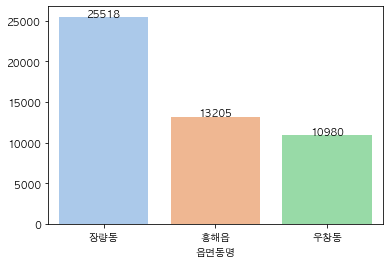

In [48]:
pohang_top3
sns.barplot(x=pohang_top3.index,y=pohang_top3.values,palette='pastel')
for idx, value in enumerate(pohang_top3.values):
    plt.text(idx, value, value, ha='center')

파란점-상위 3개의 읍면동
빨간점-포항시 북구 '흥해읍 환승센터' & '장량동 행정복지센터'(인구 多)

In [49]:
#포항시 북구
import folium
center = [36.0768402, 129.3872069]

m = folium.Map(location=center, zoom_start=10)
m = folium.Map(location=[36.0768402, 129.3872069],
               zoom_start=17, 
               width=750, 
               height=500
              )
tooltip=['장량동','흥해읍','우창동']
for i in range(len(latitude2)):
    folium.Marker([latitude2[i], longitude2[i]],
                        color='tomato',
                        radius = 100, 
                        icon=folium.Icon('blue'),
                        tooltip=tooltip[i]).add_to(m)
tooltip=['장량동 행정복지센터','흥해읍 환승센터']
for i in range(len(tooltip)):
    folium.Marker([lat_po[i], long_po[i]],
                        color='tomato',
                        radius = 100, 
                        icon=folium.Icon('tomato'),
                        tooltip=tooltip[i]).add_to(m)
m

셔틀버스 출발: <흥해읍 환승센터> - <장량동 행정복지센터>